The terms "white box" and "black box" are metaphors used to describe the level of transparency and understandability of machine learning (ML) models. These concepts are crucial in discussions about the interpretability, trustworthiness, and ethical implications of AI systems. Here's a breakdown of what each term means:

### White Box Models

**Definition**: White box models are machine learning models characterized by their transparency and the ease with which humans can understand how the model makes its decisions. The "white box" metaphor suggests that one can see inside the model, understanding its inner workings and logic.

**Characteristics**:
- **Interpretability**: These models often use simpler, more interpretable algorithms, such as linear regression, decision trees, and rule-based systems. The decision-making process in these models can usually be followed step-by-step.
- **Transparency**: The model's structure and the reasons for its predictions are transparent, making it easier for users to trust and validate the model's decisions.
- **Ease of Explanation**: They can be easily explained to non-expert audiences, making them suitable for applications where explanations are necessary for compliance, ethical, or practical reasons.

**Examples**:
- **Decision Trees**: A flowchart-like structure where each node represents a feature, each branch represents a decision rule, and each leaf represents an outcome.
- **Linear Regression**: A model that predicts a dependent variable's value based on the linear relationship between input features.

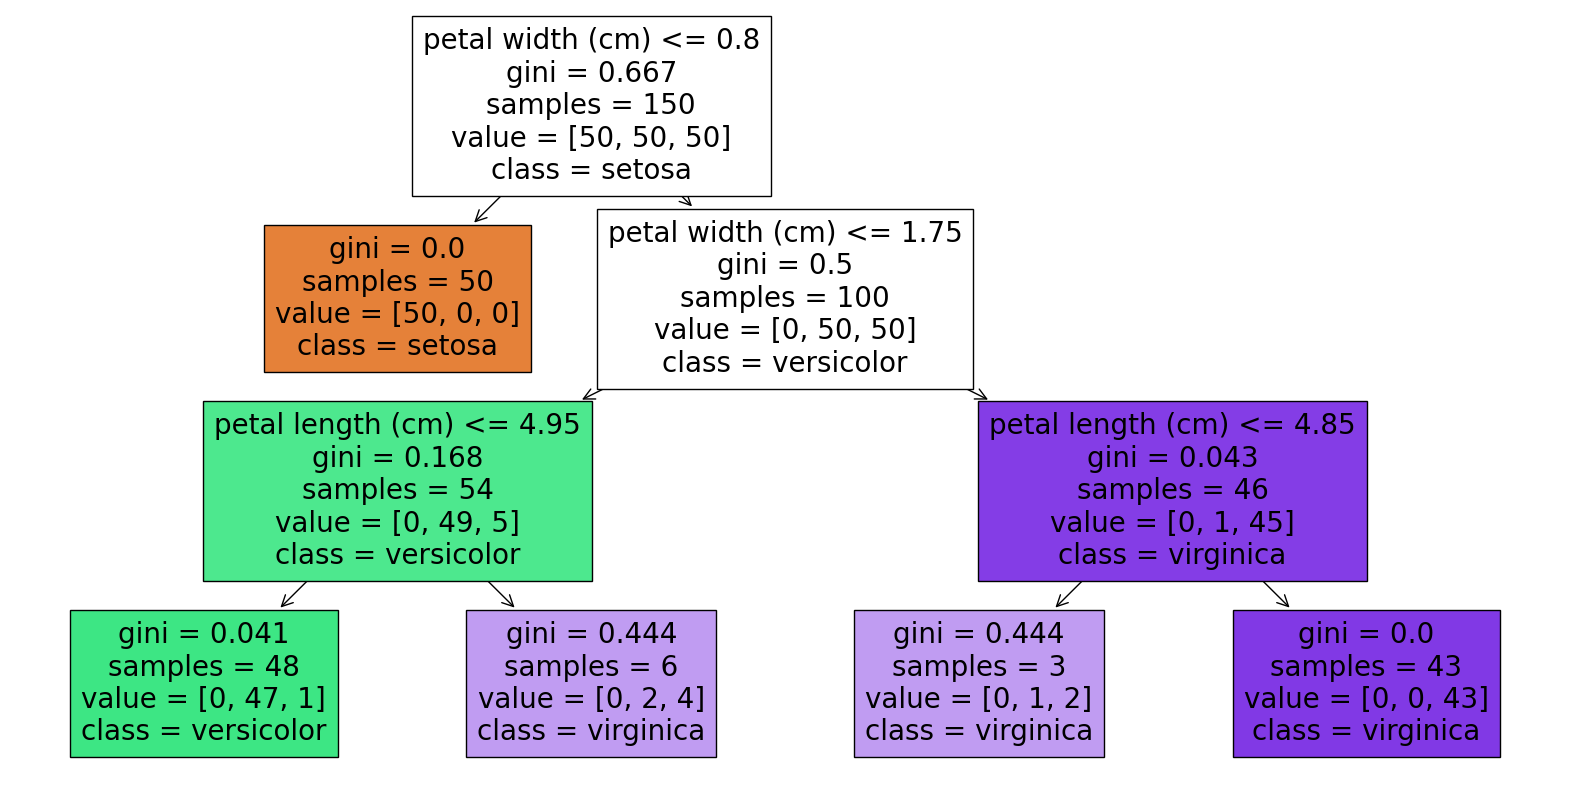

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)  # Limiting depth for simplicity

# Train the model
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf,
          filled=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.show()

In the visualization, each node represents a decision based on one of the features, and the leaves represent the final predictions. This clear and straightforward visualization exemplifies why decision trees are considered white box models: you can trace the path from the root to any leaf to understand exactly how the model makes its predictions.

### Black Box Models

**Definition**: Black box models refer to complex machine learning models whose internal decision-making processes are not readily understandable by humans. The "black box" metaphor indicates that it's difficult to see inside the model to understand how inputs are transformed into outputs.

**Characteristics**:
- **Complexity**: These models, including deep neural networks and ensemble methods like random forests and gradient boosting machines, can capture complex patterns and relationships in the data but at the cost of transparency.
- **Limited Interpretability**: The reasons behind their predictions are not easily discernible, making it challenging to explain their behavior in human-understandable terms.
- **High Performance**: Black box models often achieve higher accuracy and performance on complex tasks, such as image recognition, natural language processing, and predictive analytics, compared to simpler white box models.

**Challenges**:
- **Trust and Accountability**: The lack of transparency can lead to issues with trust, especially in critical applications like healthcare and criminal justice.
- **Ethical Concerns**: The inability to explain decisions may raise ethical concerns, particularly if the model's decisions impact people's lives significantly.

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Preprocess the data
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode labels
y_onehot = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_onehot,
                                                    test_size=0.2,
                                                    random_state=42)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1], )),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')

Test loss: 0.014, Test accuracy: 1.000


## Surrogate Models
A surrogate model is a simplified representation that approximates the behavior of a more complex, often opaque (black box) machine learning model. The primary goal of a surrogate model is to make the predictions and decision-making process of the black box model understandable to humans, without sacrificing too much accuracy. Surrogate models are especially useful in domains where interpretability and transparency are crucial, such as healthcare, finance, and criminal justice.

### How Surrogate Models Work

A surrogate model emulates the behavior of a black box model by learning the relationship between the input features and the output predictions of the black box. This process involves:

1. **Sampling and Predictions**: Generating or using an existing dataset where each instance is inputted into the black box model to get its predictions. This dataset, now enriched with predictions, serves as the training data for the surrogate model.

2. **Model Training**: Selecting a more interpretable model structure (e.g., decision tree, linear regression, or rule-based models) as the surrogate. This model is then trained on the dataset created in the first step, aiming to replicate the decision-making process of the black box model as closely as possible.

3. **Interpretation and Analysis**: Once trained, the surrogate model can be analyzed using various interpretability techniques. For example, decision trees can be visualized, and the importance of different features can be extracted in linear models. This analysis provides insights into how the original black box model makes its decisions.

### Advantages of Surrogate Models

- **Transparency**: They offer a way to understand complex models by approximating their functionality with simpler, interpretable models.
- **Flexibility**: Surrogate models can be applied to any black box model, regardless of its complexity, as they do not require changes to the original model.
- **Insightful**: They can provide valuable insights into feature importance and model behavior, aiding in model debugging, validation, and improvement.

### Limitations

- **Approximation Error**: Surrogate models are simplifications, which means they may not capture all the nuances of the black box model. The accuracy of interpretation depends on how well the surrogate model can approximate the original model.
- **Complexity Trade-off**: There's a balance to be struck between the interpretability of the surrogate model and its ability to accurately mimic the black box model. More interpretable models may offer less precise approximations.

## Explanation Scope

### Global Explanations

Global explanations aim to provide an overall understanding of how a machine learning model makes decisions, regardless of individual instances. These explanations seek to answer questions about the model's general behavior and logic across the entire input space. Global explanations are particularly useful for gaining insights into the model's decision-making process as a whole, identifying potential biases in the model, and understanding the relative importance of different input features.

**Examples of Global Explanations:**

- **Feature Importance:** Techniques such as permutation feature importance can be used to measure the impact of each feature on the model's predictions across the entire dataset.
- **Model Visualizations:** For some models, like decision trees, the entire model structure can be visualized, offering a global view of how decisions are made.
- **Rule Extraction:** Generating a set of rules that approximate the behavior of the model across all possible inputs.

let's see an example of "Feature importance":

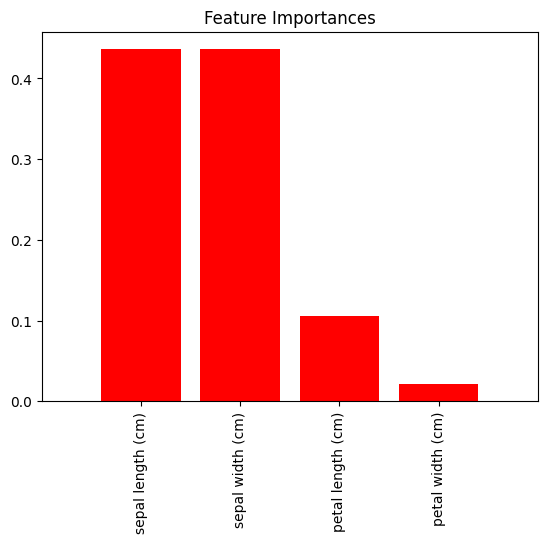

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In the plot, the x-axis represents the features of the Iris dataset, and the y-axis represents the importance of each feature. This approach to displaying feature importance is a powerful tool for interpretability, allowing you to understand which features your model is relying on most for its predictions.

### Local Explanations

In contrast, local explanations focus on explaining the prediction of a machine learning model for a single instance or a small group of instances. This type of explanation is crucial when we need to understand the specific reasons behind a particular decision made by the model, such as why a loan application was denied or why a medical diagnosis was given. Local explanations provide detailed insights into the decision-making process for individual predictions, which can be critical for applications where accountability and transparency are essential.

**Examples of Local Explanations:**

- **LIME (Local Interpretable Model-agnostic Explanations):** This technique approximates the behavior of a complex model with a simpler, interpretable model for individual predictions, providing insights into why the model made a specific decision.
- **SHAP (SHapley Additive exPlanations):** SHAP values explain the prediction of an instance by computing the contribution of each feature to the prediction, based on cooperative game theory.
- **Counterfactual Explanations:** These explanations describe how altering certain inputs can change the prediction to a desired outcome, offering insight into the decision-making process for a specific instance.

In [7]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Create and train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first instance in the test set
shap.initjs(
)  # Initializes JavaScript visualization
shap.force_plot(explainer.expected_value[0],
                shap_values[0][0],
                X_test[0],
                feature_names=iris.feature_names)

The force_plot visualization provides a detailed view of the contribution of each feature to the prediction for an individual instance. Features pushing the prediction higher are shown in red, while those pushing the prediction lower are in blue. This insight is invaluable for understanding why the model made a specific prediction, helping to demystify the decision-making process of complex models.

When interpreting a force plot, here's how the base value fits into the overall explanation:

- **Base Value:** It is the value that would be predicted if we did not know any features for the current instance. In other words, it's the model's output when no specific information is provided. For a classification model, this could be the log odds of the positive class in a binary classifier or the probabilities of each class in a multi-class classifier. For a regression model, it's the average outcome.

- **SHAP Values:** Each feature's SHAP value indicates how the presence of this feature in the current instance shifts the prediction from the base value to the final model prediction. Features pushing the prediction higher than the base value are shown in one color (e.g., red), and those pushing the prediction lower are shown in another color (e.g., blue).

The force plot visually represents this shift for each feature, starting from the base value and adding each feature's effect, leading up to the final prediction. This way, you can see which features have the most significant impact on the prediction and in which direction.

The concept of a base value is fundamental in SHAP and many other interpretability methods because it establishes a reference point from which the contributions of individual features can be assessed. This helps in understanding not just how the model arrived at a particular prediction, but also in comparing the relative importance and effects of different features on the model's decisions.